In [79]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [80]:
# import dataset
df = pd.read_csv('01 - med_appt_clean.csv')
df.sample(5)

,patientID,apptID,gender,sched_date,appt_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow,waiting,sched_day,appt_day,sched_weekday,appt_weekday,weather
17924,629216524559,5650179,F,2016-05-03,2016-05-06,44,FORTE SÃO JOÃO,0,0,0,0,0,1,No,3,1,4,1,1,sunny
77006,148839321319,5775107,F,2016-06-06,2016-06-06,3,JOANA D´ARC,0,0,0,0,0,0,No,0,0,0,1,1,sunny
27387,272769158826,5742714,F,2016-05-30,2016-05-30,5,CONSOLAÇÃO,0,0,0,0,0,0,Yes,0,0,0,1,1,sunny
78456,6248227138427,5785571,F,2016-06-08,2016-06-08,44,SANTOS REIS,0,1,1,0,0,0,No,0,2,2,1,1,sunny
10918,52296357186521,5665179,M,2016-05-05,2016-05-05,47,INHANGUETÁ,0,1,0,0,0,0,No,0,3,3,1,1,sunny


In [81]:
# patientID and appointmentID is serial number to identify the patients and appoinments (not necessary to include in EDA)
# sched_date and appt_date has been extracted to another feature, we can delete them too
# we can drop those columns
df = df.drop(columns=['patientID', 'apptID', 'sched_date', 'appt_date'])
df.sample(5)

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow,waiting,sched_day,appt_day,sched_weekday,appt_weekday,weather
90543,F,39,SÃO JOSÉ,0,0,0,0,0,0,No,0,2,2,1,1,sunny
60154,F,17,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1,1,1,1,sunny
33907,M,21,SANTA TEREZA,0,0,0,0,0,0,Yes,10,1,4,1,1,sunny
19110,M,53,DO QUADRO,0,0,0,0,0,0,No,0,2,2,1,1,sunny
19694,M,25,ANDORINHAS,0,0,0,0,0,0,Yes,4,4,1,1,1,partly sunny


In [82]:
# our no-show is the target column in this analysis
# it will be more convenient to put the target column in the last column of the dataframe
df = df[['gender', 'age', 'neighborhood', 'scholarship', 'hypertension','diabetes', 'alcoholism', 'handicap', 
         'waiting', 'sched_day', 'appt_day', 'sched_weekday', 'appt_weekday', 'weather', 'sms_received', 'noshow']]
df.sample(5)

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,waiting,sched_day,appt_day,sched_weekday,appt_weekday,weather,sms_received,noshow
46286,F,12,MARIA ORTIZ,0,0,0,0,0,15,3,4,1,1,sunny,0,Yes
21900,F,28,JESUS DE NAZARETH,0,0,0,0,0,0,1,1,1,1,partly sunny,0,No
1380,M,49,MARIA ORTIZ,0,0,0,0,0,0,4,4,1,1,cloudy,0,No
1808,F,60,SÃO BENEDITO,1,1,0,0,0,11,0,4,1,1,cloudy,1,No
44249,M,42,SANTA CECÍLIA,0,0,0,0,0,13,4,3,1,1,sunny,0,No


# Exploratory Data Analysis (EDA)

## gender

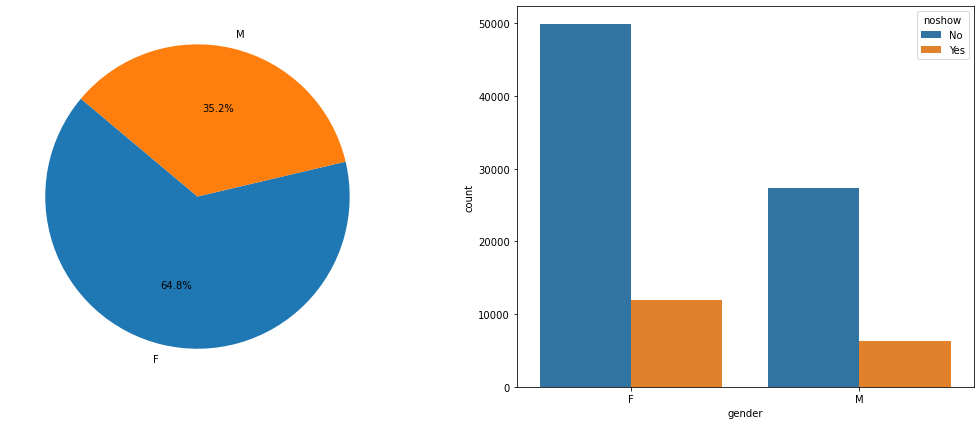

In [83]:
# creating pie chart and bar chart for gender
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.pie(df['gender'].value_counts(), labels=df['gender'].unique(), autopct='%1.1f%%',startangle=140)

plt.subplot(1,2,2)
sns.countplot(df['gender'], hue=df['noshow'])

plt.show()

# this database is dominated by female (64.8% of population)

In [84]:
# how gender affect noshow value?
pd.crosstab(df['gender'], df['noshow'], normalize='index').round(4)*100

noshow,No,Yes
gender,,
F,80.72,19.28
M,81.34,18.66


**GENDER SUMMARY**
- Female dominated the medical appointment booking.
    - It is confirmed that in 2016, the population of women is nearly equal to men.
    - HIV/AIDS rate in Brazil is quite high, the sufferers are mostly woman
    - The domination of female in medical appointment booking probably because female are more sensitive to deadly disease like AIDS and they have high awareness to keep themselves from those disease.
- The percentage of no-show patients is nearly the same between male and female
    - Gender does not really affect no-show behavior of the patients 

## Age

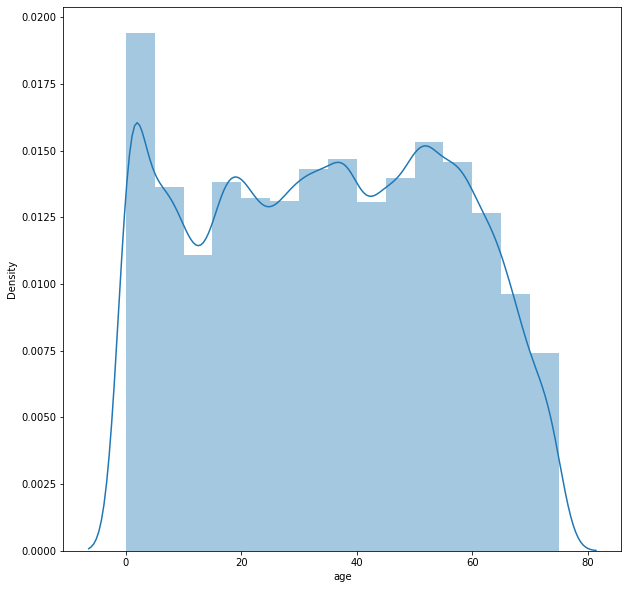

In [85]:
# create histogram to see age distribution
plt.figure(figsize=(10,10))
sns.distplot(df['age'], bins=15)
plt.show()

# the chart shows that patients are equally dirtributed from various age
# the number of patients with age 0 (infants) is the highest among all

In [86]:
# categorize the age to simplify analysis
bins= [-1,15,30,45,60,76]
labels = ['Kid','Young Adult', 'Mid-Adult', 'Adult', 'Elder']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.sample(5)

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,waiting,sched_day,appt_day,sched_weekday,appt_weekday,weather,sms_received,noshow
25080,M,Adult,ROMÃO,0,1,0,0,0,10,0,3,1,1,sunny,1,Yes
69257,M,Kid,FONTE GRANDE,0,0,0,0,0,17,4,0,1,1,sunny,0,No
64539,M,Mid-Adult,NOVA PALESTINA,0,0,0,0,0,14,1,1,1,1,cloudy,1,Yes
21925,F,Kid,JESUS DE NAZARETH,0,0,0,0,0,27,3,2,1,1,sunny,1,No
76057,F,Mid-Adult,JARDIM CAMBURI,0,0,0,0,0,0,1,1,1,1,sunny,0,No


In [87]:
# patient count based on age category
df['age'].value_counts()

Kid            21044
Adult          20916
Mid-Adult      20049
Young Adult    19145
Elder          14147
Name: age, dtype: int64

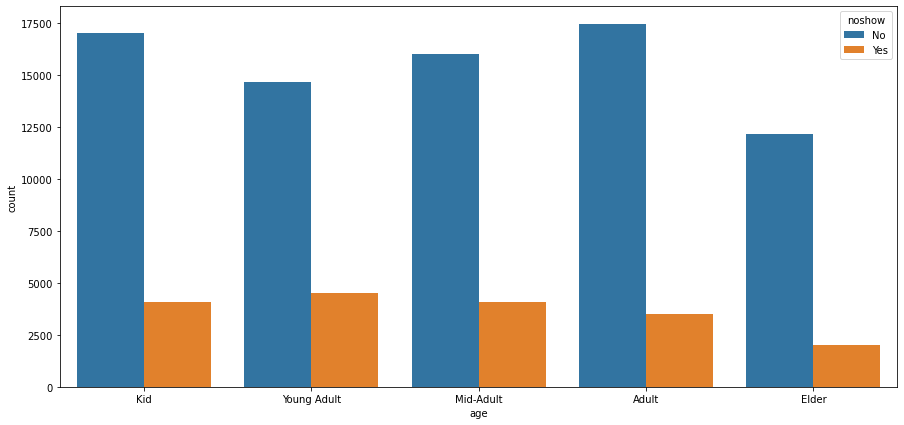

In [88]:
# creating countplot to see the dictribution through categories
plt.figure(figsize=(15,7))
sns.countplot(df['age'], hue=df['noshow'])
plt.show()

In [89]:
# how age affect noshow value?
pd.crosstab(df['age'], df['noshow'], normalize='index').round(4)*100

noshow,No,Yes
age,,
Kid,80.67,19.33
Young Adult,76.46,23.54
Mid-Adult,79.70,20.30
Adult,83.26,16.74
Elder,85.70,14.30


**AGE SUMMARY**
-  The age distribution is wide.
    - Brazil has a decentralized healthcare system that allow people to get cheap health service.
    - People at any age has responsibility to check their body, to detect (if any) deathly disease at early stage. 
    - That is why the distribution does not look like Gaussian distribution, but more into uniform distribution
- Number of infants (0 y.o) is the highest among all age. 
    - This can be called as a 'proof' that Family Health Program is successful. 
    - In FHP, every family has a family doctor to ensure healthiness of family member, espescially kids.
    - Family doctors ensure that every baby in families are healthy, so their job will be appreciated by the government.
- Young adult is the age category that have the highest no-show rate, while elders has the lowest rate.
    - [young adult] They have strict schedule of working and studying (some urgent meetings cannot be cancelled do they cancel their medical appointment without informing medical staffs)
    - [elder] They have more time to take care about their health. Besides, as elders, they are more obedient to follow medical recommendation from doctors for the sake of extending their life. 

# Neighborhood

In [24]:
# showing the map of the hospital
import folium

hospital_loc = (-20.23611242017417, -40.279455916399726)
hospital_map = folium.Map(location=hospital_loc, zoom_start=12)
img = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxIQEhATERIWFhUXFhUaFhgYGBUXFhUZFhgXGBsXFhgYHyggGBolHRgdITEhJSkrLi4uFx8zOTMtNygtLisBCgoKDg0OGxAQGy8mHyYvLS0yNjUtLS0vLS0tLy8tLSstLS0tLS0uLS0tLy0tLS0tLS0tKy0tLS0tLS0tLS0tLf/AABEIAOEA4QMBIgACEQEDEQH/xAAcAAEAAgIDAQAAAAAAAAAAAAAABgcBBQIECAP/xABGEAACAQMCAwYCBQgHBwUAAAABAgADBBESIQUGMQcTIkFRYXGBMkJSkaEUIzRzgrLB0TM1cnSSsbMVQ1RiY6LDFiRT4fD/xAAaAQEAAwEBAQAAAAAAAAAAAAAAAQIDBAUG/8QAKBEAAwACAQMEAgIDAQAAAAAAAAECAxEEEiExBRNBURQyImEjweFC/9oADAMBAAIRAxEAPwC8YiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCYJmZ1OJ3q0KbVHzpUZONzIbSW2Sk29I7WZmRW052t3bDB6fuwBHzwTiSWjVDAMpBB6EbgzPFmx5f0ezTJhyYv3Wj6xMZnVq8UoI2hqyBvsllB+6aOkvJmk34O3EwGB6TMkgREQBERAEREAREQBERAEREAREQBERAEREAREQBETiTIbByms5kod5bV13+gSMeo3x+E7vfr9offOD1UbK6gcg7ZExvJjcuepd/7LxuaT+imcy0uUqo/I6J8gCPhpYj+ErGvT0My/ZYj7jibK6v3Fpb0hkKTVLf8AMdeQPlnPzE+f4eZYLpv6/wBn03OwPkRCXy/9Fo066sPCwPwIMqXjX6RX8JH5x9ic+ZM4cKr1KdVDRJDkgADzz5H1E7vNiYu637J+9VM05XJ/Iw9WtaZjw+J+Nn6d72iTdnt5UcVUZsqmnTnqM5yPhtJlID2bv+crj/lU/if5yeZnq8C28EujyfUJU8ikjlExmZE7UziEREkCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAnFkztOUSGk+zBprvhRySn3fymuZCpwRg+klJE613aioMHr5GfOc/wBBi93g7V9fH/DqxchrtXgr/jPBdRL0vpEksPXPUg+s7/AODLc2jU6mVZajaTjdSQPL08psq6aHKEjPX5Hz+H8pilWKnKnE8Lic58XL0552vD+z0smW7xJS/HdHLgHKqWz94z94w+jtpC588ZO/vNLzPwt690zLjTpXLeWRt0HnsJva9279Tt6DYToXl2lJcuQPQeZ+A8508v1aMkezx47b8lMDzLJ7je6a0fHhNgLbUVY5IwT099hNxaW9SoepA9cn8JqOWeJ/lFzoKjQEYjPUkFACfvO0m4WdPpvpeTP/AJM1vX0mY8zLUW1S7nztqGgYyT7mfYRE+tiFKSR5rexERLECIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCYYzM4ucSGCBdoKFatGoMjKkZG24OQM/M/jPnwG/JV+/J+r3Zxueuc/h982fHOJ96Sq/QB/xH1+E+PD+FvW3HhX7R/gJ8bzXPJ5LnDPUe7janjKcnbXz8nOlfoD4lYj0GP5zV83VBXNJqSnCqwIwNtxj4yUry3Tx9Js/L+U0vFuHm3KgsCGzp8jkeRlHxOTxML3C18/ZTj5sLzKpb2a3kLa7x/03H4qZZIkAsKvdVRVABIyD7g+X4Sb2dytVAynY/h7Ge16NyovG4/8ASMPU06ye5rs0dmIie4eYIiIAiIgCIiAIiIAiIgCIiAIicKr6VYgE4BOB1OPIe8A5xK1PbNZDrQuAfMaU2/7pN+XeN0r63p3FHOhwdjjUpBIIOPPIl6ipW2iqtPwbOJjMinN/Pttwx6dOsrszqWwgU6VBxlskdTn7jKzLp6RLaS2yWRILwHtQtbyr3aUqygI7u7BQiIgJLMQxPoPiROrwbtas7i4Sh3VVA7BUqNp0licKCAcrk7fOX9q/or7k/ZYk03M9RhSGnoThvgR0m4BnXvbRay6X6ZB9Ok4uVjrJhqJem0b4qU2m/BDOGW3e1ETyPX4Df/6k3pUgoAAwB0E61lwynSOUGD6kknHznenJ6ZwPxYfV+zNeVn92u3gwBIn2iKRRosPq1OvplSP88SWz43NutQYdQw8wRkTuz4vcxuPspgy+3km/ori0u1qDY743HpJJyvXOp18iM+wI/wD34Tf0bOmuyoo+CgT7rSA6DE8fi+jPBmWRX4/o6s/OWSXPSc4iaPm3mejw2j3tbJywVFX6TsQTgZ2GwJyZ76Tb0jzm9dzeRIlyTz3Q4oai00anUQAlGwcqdtSkbEZ2MlmYpOXphNNbRmIiQSIiIAiIgCIiAIiIAmG6TMGAecO1Xgn5Jf1CoxTrfnU9MsfGP8eT+0JK+wjjWGuLNj1HfU8+vhV1Hp9U4/tGSPtl4D+UWXfKM1Lc6x66DgVB8MAN+xKU5Z4wbK6t7gdKbgt7odnH+En7hPQn/Lh18o46/hkPVFR8bnoOp8hj1nl/nLjf5feXFfPhZtNP2prsv3/S+cuntU5hFtw5u7bx3GEpkH6rDLsP2M7+pEojgXDGu7ihbp1qOq5H1RnxN8FXJ+UpxZ6U7ZbPW9Si1+yflJXsLqpVBBu1emp81pAFcj4tk++BNNwHslvVuqJuDSFKm6MzIxJcIwbCqRkZx5y3LykLWyqLR8ApUGFPYeHQnh6/CUhwPtE4pUuLVHuiVetRVh3dEZDVFUjITbYys1kvqqSaUTpM9AVbhaaM7sFVQSxJAAA3JJPlK/5P56qcS4nWp0zi1SixQEDU5DoO8Y9RnJwPTrvIt2wc3vVqvY0tS0qZHencd4+AQv8AYGR8T8N4BwLjNxZ1DUtahRyukkKrHSSCRhgR1Ak4uPuG35F5tVpHq0GcpS3ZrzlxC6v6dK4rl6ZSoSDTprkgZG6qDNz2jdpZtHNtaBWqr/SO260jgEKq9HbB9cDbY74xeCurpRr7s9PUWfmajmvjiWFtVuHGQgGB01sxCqoPuSPxPlPPdXnvibHUb2r8tIAz7AYxNxwvtBatoo8WprdW+rOoripT2I1YXAqYz0xn3JxNHxaXd9ynvp9i1OQOabjiStVe2FGiNlbWWNRvPSNI8I9fXbykvzItzTeC14XXqWZCBKINEoFKqMrgqCCCMSruTu0C/q3tslxdZolm7zKUlGlUdjkhQR0z8pmsTvdT4RbrU6TL6zIZ2n8p1OJ29NaJAq0n1qGOFbKlSpODj1z7SruZu029r1mNtVajRB8AULqYD61QkE5Pp5fGbe9534kOFW1z3wWo109MOEp5qU0ptuwIK51gjYDpLzgyS0yryy9okPZZyLcWFWtcXWkMyaERW1YBYMSxAx5DGPeWWplS9kvNt7fXVandVzURaOoArTXB1KM+FR5GdLnntLvEua1taBaYpuaevHeVHZeukEYXz2wTtmReK7yNPyTNzMJoujMZnmu85p4zSw1avdU89C6MinPpqUAyZdmvaNcVrina3jCp3mRTqYCuGxkK2kYYHHXrnHXOyuNSnq2gsyb1ouOJgGZnObCIiAIiIAiIgCIiAfG4oh1ZWGVYEEHzBGCJ5Z5m4O1ldXFu3+7chSfrId1PzUj8Z6rlO9u/A/6C8Uf9Kpj9pkY/9y591nTxb6b0/kwzzudlbcX47VuqdpTqHIt6Zpp13GrOT+yFH7MsjsK4Blq1646ZpUs++C7D8Fz/AGpVFrbtVdKaDLuyqo9WY4A++epuWuDrZW1C3TpTQAn7TdWY/E5M35NdEdK+TLDPVW2Z5k/RLr9TV/cM8x8s/pdj/eLf/VSenOZf0S6/U1f3GnmPlr9Lsf7xb/6qTPi/rRbP+0l1duSj/Z6nH+/p/wCTSE9hi54hVz/w7/v05Oe3BCeHAjotekT8DqX/ADIlcdkPFqVrf6qzqiPSdAzHChiyFQT5Z0n8JOLbwMX2yov7iFUUaNWpgeBHboPqqT/CeUVZ61QZOXqPuTvlqjbnf3M9N1uO2dyWtEuKb1KqOAqHWcaTknTsBj1nmarQqW9Uow01KT4IPkyN/MSeJ26vsZ2u30eoOC8v0LSgtCnSXQFw2QDrPmz5HiJ95QHaVwVLLiFalSGmmwWoijoofOVHoNQbA9Jd/BeebK4t1rG4p08KDUV2CtTONwQdz8usovtB44t/fVa1P+jwqU87ZVPPfpkknHvK8ZV7j2MznoJvwK+aty1eq2T3QqUwT6Ao4HyDYlVWdu9V0p0xl3YKo9Sx0j5by2eDcNahy1dlhg1ler8mKKp+aqD85Bezdc8UsM//ACn8EczXG9dbRWl+qLf4X2XWFKgKdWl3rkeKqSQxY/YwfCB5fjmRrtc4Sllwzh9vTzpp1yATjUfzdQ5bG2TLglX9vv6Jaf3j/wAVScuK6rIts3ySlD0RnsI/Tbj9Qf31lmDh/D+FvcXdZkR61R2apUK6vGSdFPzx7Dcys+wo/wDvLj9Qf31kL5q45VvLitWqsWOpgi+SKCcIo8v4ze8TvK/oxm1MIsfnjtPtLmhXtqNF6odSvePhFBPRlByxIO42HlK75O/rDh/96t/9RZbF5ypY8P4TcugRqj27fn2wWdmXbuyfog52C/zlScqVQl9YsxAVbmgST0AFRck+glsfT0UpK3vqTZ6qEzPhZ3aVVLU3VwCRlSGGR1GR5z7zzztEREAREQBERAEREATU8z8GW9tbig3+8QgH7LdVb5MAZtohPT2Q1taKg7Oeze5tbtbi8RQKak0wrhs1GGnO3kASfiRLexMxL3bt7ZEypWkdHjNs1WhXppjU9N1GdhllIH+cpXgvZTxKlcW1RxR0061F2xUJOEdWOBp3OBL4iTGWoTS+SKhU9s1XMfBkvretb1NldcZHVSDlWHuCAZR192UcTpsVVEqLnZlcAEepDYI+E9DTGJOPLWPwReOa8lSdmvZ3eWV0tzcd2qqrjSG1OSwx5DSB8/LpN5z92bJxBu/ouKVxjfI/N1cbDXjcEdNQ+4ywIh5qddXyFjlLR51q9lPFAcd1Tb3FVcfjg/hJPyn2PuHWpfsmkHIpIS2rHQVGwNvYffLixMy9cm2tELDCNFzhwl7mxubegFDvT0oCdKjcdSOg2lacm9ml/a31rXqilopuS2moScaGXYad9yJdETOclSml8lnCb2JCO1Xli44lQoU7bRqStrbW2kY0OuxAO+SJN5gys05e0WpJrTKu7MORrzh1xVq3Pd6WpaRocsc6lO4wNsCR/mrsou+/qvaaKlJ2LBSwV01EkqQ2xUeRB+W03/azz81srWlo+K+M1KineiMAgD0cjf2HxEsqwOqlSJ3yik/MCbPLkl9f2YqIr+K+CleCdkF5Vx+V1FpIoOlQ3eOCfQfRQZxnGSfSawdk/FC+nu6WM/TNUaPjsNWPlPQoEYj8rIT7EEe5D5dbhtoluzhyGZiVGF8RzgA+Q9ZIoiYN7e2apa7CIiQSIiIAiIgCIiAJxM5TiYBU/anzpe21ytnaHRmmja1XVVYuW8KgggfR8hneQa+suNhDXqi+C9SddUED1ZVOVHxAl48WWxs6j31yaaVCqp3j41BVz4aY65OdwNzILxztjp707O2aoT4Q1XwqxO3hprlm+BwZ1Y6bSUyc9rvumQ/lDtCu7StTFau1W3JAqLUOsqp6urHcEdeuDiWz2sX1Whw2q9Go1Nw9EBlOCAagB39xPON0dn2xs2w2A67AeQ9p6D7Yf6pqf27f/UWaZsaVy9eSuOm5ZUdhzzxGkWK3VRiVKjWdenOPEqnbVttt5zpXnFOIKwerWu0Y9C71kB+GSB903vY9SVuJ0tSg4SqRkA4IGxGeh95evMfCKV5b1aNVQVZTjO5VsbMvoQd5bLknHeulFccO53sq7sz7RKr1ktL19es4pVTjUG8kcjqD5E75wN9ptO1fnO6s6tK2tCEZ01F9IZ8liAqA5A6HyJlJrVamQwOGQ5B9GU5z94npq+FlSKcQuTTVhTRRUqY8AOWxTB6MdR6bmUzRMWqSLRTqWtlJXdpxxkNeoL7TjJOqqpA65KAhgPlOPLXP95Z1EZ6z1qWRrp1GL5XzKs24YdRv8ZPOO9slFDos6DVD0D1PAhJ6aVHib54lNXjlmdiACxYkAYAJJOAPLGek2xy7TVzopbUv+LPTfOl2y8NvKtJyrC3dkZTgjw5BBlJ8o823hvbTvryqaXer3gZzp0jJOfbaW5zFvwOvn/gv/GJ52tbd6rpTpjLuwVR6sxAG/lvMePCc0mXy000Sjmrn67vKzNTrVKNEH83TRihx6uV6seuPLOPKTDl/mriNPhD19NW5qvWNKgRTLsihN6j6BllBDAE+eATiTTgvIFhQtxSe2pVWx43qU1Z3bzOWGVGegHSb7g3CqVpRSjRXTTTOkZJxkk9TueszvLGtSvBeYre2zypcuzMxcksSSxbqSepPvmSVeIcbx4Tf4xtinXxjyx4ZHOL/ANLcfrKn7xnq/hv9DR/sJ+6J0Z8qhLsmY4o6t9zrcuM5tbY1NWvuaevVkNq0jOrO+czZzGJmecztQiIgCIiAIiIAiIgCIiAJxacpxMA83dqXEKlbiVyKhOKTBKY8lUAHYepJyT7+0sHs1HDbSwS6apSWqQ3eu7LrUgnwKDuPgOvvPt2g9mTX9Y3NtUVKjAa1cHQxAwGDKCVOOuxzgdJoOD9jFYuDd10CDqtHUzsPTUygLn4GdruKxpb0cii1betlWXp1GoR5liPmTiXd2kcet7zhFf8AJ6q1ND22rTnwlnGAT67TQcS7GrnvX7itR7kk6dZqB1XPQgKQcDzyM+07XNHJq8K4Pdr3pqNUq25c4CqCrgeEdfPzJl7vHTnTImalPaIT2eccpWF9Tr19XdhXUlRkjUMZx1I+EtTmjtVskoOLSoatZlIQBHAUkY1OWAAx1x1lTckcAXiF0LdnKakqEMuDhlGRkHqPbb4yUv2NXwbC1rYr9omoDj3XQd/bJ+MZljd7t9yMbtT/ABRAeD8Ma5rUbdMlqjqg9RnqfkMn5SV9rt878RqUmP5ugtNaa+Q1U0Zj8Tnr6AS0uROz6lwwmozd7XIxrwAqg4yEHUZxuSc/CdLtE7OP9o1BcUKi062ArBwdDgfRJK7qR0zg5Ej8iHk7+C3s0o/s1fZPS4db2n5VUekK2X7x6jKGpgHZVBPhBAB23OfOVDxWoHrV2U5DVKjKfUMxIP3SyeGdi9wzA3VemqDqKWpnPsC6gL8d5y4x2NXBrMbWtSFEnwioXDoPQ6VOr47SZyY5tvq8kVFuV2JRfcftrng11ToVVd6diNYGfBmngBvQ5B29pUfIP9ZWH69JbPBOzM2tpfUVuNVW5ommWK4ppscEL1+t6/KaflvsnubW6tq7XFJlpVFYgLUBIHkM7TOMkTNLfkvUU3LLexEZgziOk8ncwW5S5u6Z201qq/LW2D8/4y9+FdpnDRa0nqV9LhFD09LlwwAyAAN9/MbTWc+dlxvazXNrVWnUfHeI4OhiABqDKCVOBvsc+0jFr2MXrH87XoIvqveOfkulf853VWLJK6n4OWZuG9Iuzh16telTqoDpdVZc9cMMjPvvOzOlwiz7ijRpZz3dNEzjGdIAzj5TuziZ1IREQBERAEREAREQBERAEREAREQBIL20f1XW/WUP9RZOp0ON8Io3lI0bhNdMlSVyRkqcjcb9ZaK6aTK0tpoobsa/rSl+rrfuy677jxpXVK37vIfT4tWMas+WN+nrPjwbkqxs6orUKASoAQGDOdm2OxJml5pps/EKK020uVQK32Tlt5tdLLe/6M4lxOiS8ycZNnSWoE15cLjVpxkMc5wfs/jNjbVtaI2MalBx6ZAOPxkA5r4fc0qSmvcd6pcALgjB0sc/dmbLmO5fRYUQ5RKgXWw2+wMZ+efumfQmlo033JlqjMhVqptL6lRpVXanUXxKzasfS/Hwg59zOlxNHo1qr3IqsjOdFWnU+hucADpkDbBx0ke2Nlg6pkNIbzIO8vrVO8ZUemMlW07ZqH8cYmOXyaF9Ut0qM9LSTuc4IAP374jo7bJ2SPhV9Uq953lE0tLkLk51AfW6TsWd6lUM1M5AZlJ8sr1x6yH8uIalDiCl269QTnYOcA+k+3IthTKLWLNrDOAurw4x9n4SahLbITJlmanmHjJtVpEJr1vp+lpxt16HMhnFWVkqVaJrsVfxVmfSuSdlReuPuxNpzXVL21gxOSWQk+pKZMKNNDqJqJynFZymZYREQBERAEREAREQBERAEREAREQBERAMYnQr8GpPVSswPeLjSdRA26bdD1mwiAdHinCqVyoSqCVDagASN8EeXsZi84RRrU1p1F1KoGNzkYGNj1nfiTsGq4Zy/QtyWpqdR+sxLED0Gek+NblW1dy7ISSxYjU2kknJOM+s3cRtkaIhzBw3vr62DITT0YYgHSN6mBkdPKbzhPBKFtk0lwT1JJJ28smbLEzJdNrQ0a/h/B6VDvBTBGs5bJJz19fjOvYctW9Cp3lNSG3x4mIGdjgdOk3ESNsaND/6RtPF4GwfLU2B8Bnadl+XrdqdOkVOhDqUam6+pOd5tYjqY0YC4mYiQSIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAf/9k='
tip = f"<img src='{img}' width='150' height='150'><strong>Vitoria Apart Hospital</strong>"
folium.Marker([-20.23611242017417, -40.279455916399726], tooltip=tip, icon=folium.Icon(color='black', icon='medkit', prefix='fa')).add_to(hospital_map)
hospital_map

# the hospital is very strategic, it is  near the beach and near the airport

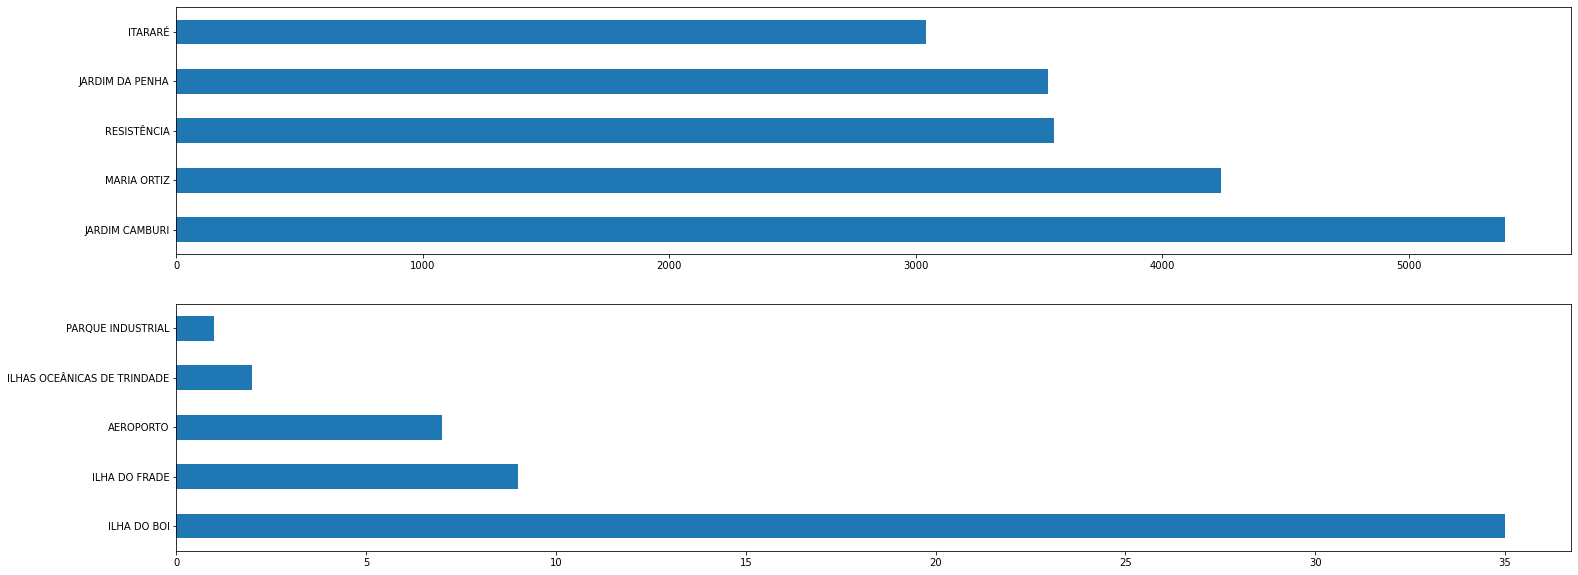

In [25]:
#  top 5 area with most patients
plt.figure(figsize= (25, 10))

plt.subplot(2,1,1)
df['neighborhood'].value_counts()[:5].plot(kind="barh")

plt.subplot(2,1,2)
df['neighborhood'].value_counts()[-5:].plot(kind="barh")

plt.show()

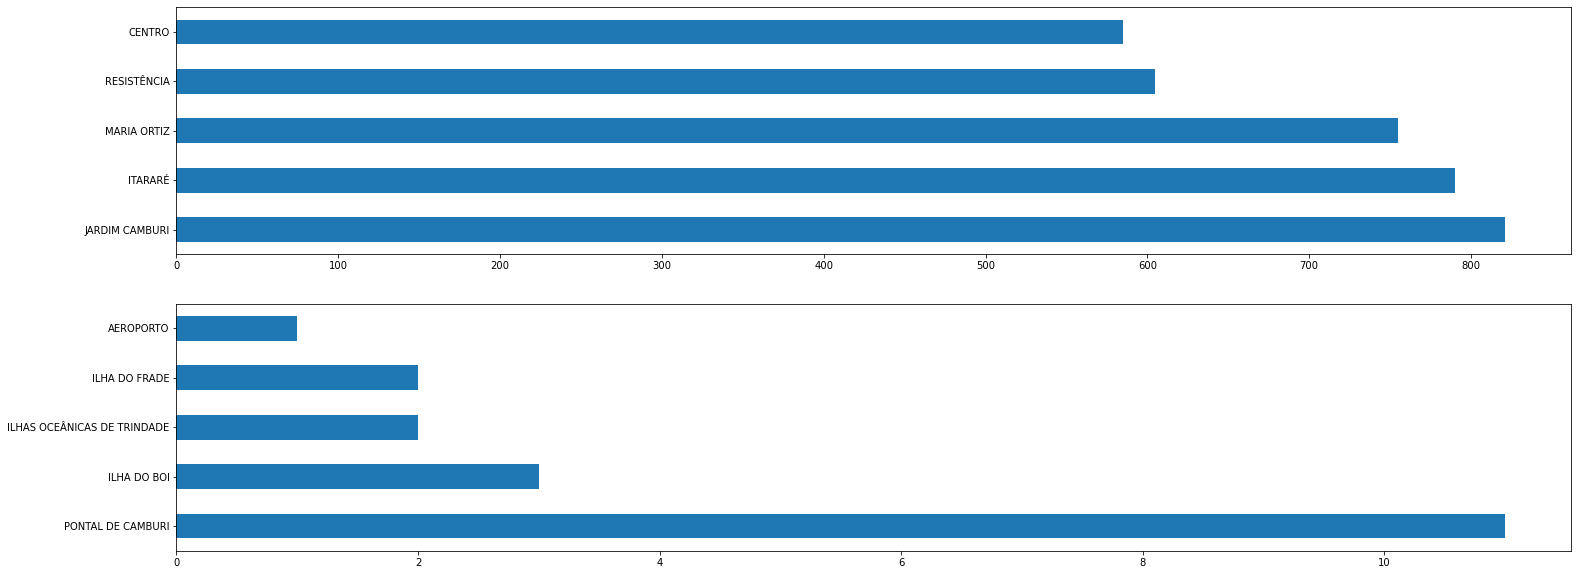

In [26]:
#  top 5 area with most no-show patients
plt.figure(figsize= (25, 10))

plt.subplot(2,1,1)
df[df['noshow']=='Yes']['neighborhood'].value_counts()[:5].plot(kind="barh")

plt.subplot(2,1,2)
df[df['noshow']=='Yes']['neighborhood'].value_counts()[-5:].plot(kind="barh")

plt.show()

In [27]:
# map of patients' neighborhood
geo = pd.read_csv('02 - geoloc.csv')
for i in range(len(geo)):
    tip = f"<width='150' height='150'><strong>{geo['neighborhood'][i]}</strong><p><br>No-show Rate: {geo['noshow_rate'][i]}</p><p>No-show Count: {geo['noshow_count'][i]}</p>"
    folium.Marker([geo['lat'][i], geo['long'][i]], tooltip=tip, icon=folium.Icon(color='blue', icon='home', prefix='fa')).add_to(hospital_map)
hospital_map

In [28]:
# does neighborhood affect noshow value?
neighborhood = pd.crosstab(df['neighborhood'], df['noshow'], normalize='index').round(4)*100
pd.set_option('display.max_rows', neighborhood.shape[0]+1)
print(neighborhood)

noshow                           No     Yes
neighborhood                               
AEROPORTO                     85.71   14.29
ANDORINHAS                    77.84   22.16
ANTÔNIO HONÓRIO               80.63   19.37
ARIOVALDO FAVALESSA           78.20   21.80
BARRO VERMELHO                78.32   21.68
BELA VISTA                    80.00   20.00
BENTO FERREIRA                77.06   22.94
BOA VISTA                     82.15   17.85
BONFIM                        81.07   18.93
CARATOÍRA                     78.56   21.44
CENTRO                        79.84   20.16
COMDUSA                       81.76   18.24
CONQUISTA                     81.97   18.03
CONSOLAÇÃO                    82.67   17.33
CRUZAMENTO                    81.11   18.89
DA PENHA                      81.47   18.53
DE LOURDES                    84.77   15.23
DO CABRAL                     85.48   14.52
DO MOSCOSO                    77.81   22.19
DO QUADRO                     83.11   16.89
ENSEADA DO SUÁ                77

**Top 5 Area with Highest No-Show Rate:**
1. Santos Dumont (27.43%)
2. Santa Clara (27.11%)
3. Itarare (25.99%)
4. Horto (24.85%)
5. Ilha Do Principe (23.77%)

**Top 5 Area with Lowest No-Show Rate:**
1. Ilha Do Boi (8.57%)
2. Mario Cypreste (14.20%)
3. Aeroporto (14.29%)
4. Do Cabral (14.52%)
5. Santa Martha (14.60%)

In [29]:
# adding those place to hospital map

# top 5 highest
folium.Marker([-20.300920698674975, -40.31720840057835], tooltip='Santos Dumont', icon=folium.Icon(color='red', icon='warning', prefix='fa')).add_to(hospital_map)
folium.Marker([-20.318545922233273, -40.345188848427405], tooltip='Santa Clara', icon=folium.Icon(color='red', icon='warning', prefix='fa')).add_to(hospital_map)
folium.Marker([-20.29555740119448, -40.307509731686814], tooltip='Itarare', icon=folium.Icon(color='red', icon='warning', prefix='fa')).add_to(hospital_map)
folium.Marker([-20.309688758929017, -40.310872537451466], tooltip='Horto', icon=folium.Icon(color='red', icon='warning', prefix='fa')).add_to(hospital_map)
folium.Marker([-20.321618088239063, -40.350179967774785], tooltip='Ilha Do Principe', icon=folium.Icon(color='red', icon='warning', prefix='fa')).add_to(hospital_map)

# top 5 lowest
folium.Marker([-20.309743701754364, -40.283116286128354], tooltip='Ilha Do Boi', icon=folium.Icon(color='green', icon='angellist', prefix='fa')).add_to(hospital_map)
folium.Marker([-20.319039770735635, -40.35548187745553], tooltip='Mario Cypreste', icon=folium.Icon(color='green', icon='angellist', prefix='fa')).add_to(hospital_map)
folium.Marker([-20.2515423730173, -40.27983866924873], tooltip='Aeroporto', icon=folium.Icon(color='green', icon='angellist', prefix='fa')).add_to(hospital_map)
folium.Marker([-20.315707440651657, -40.34706361777495], tooltip='Do Cabral', icon=folium.Icon(color='green', icon='angellist', prefix='fa')).add_to(hospital_map)
folium.Marker([-20.286430292622065, -40.31087726978543], tooltip='Santa Martha', icon=folium.Icon(color='green', icon='angellist', prefix='fa')).add_to(hospital_map)

hospital_map

# Scholarship

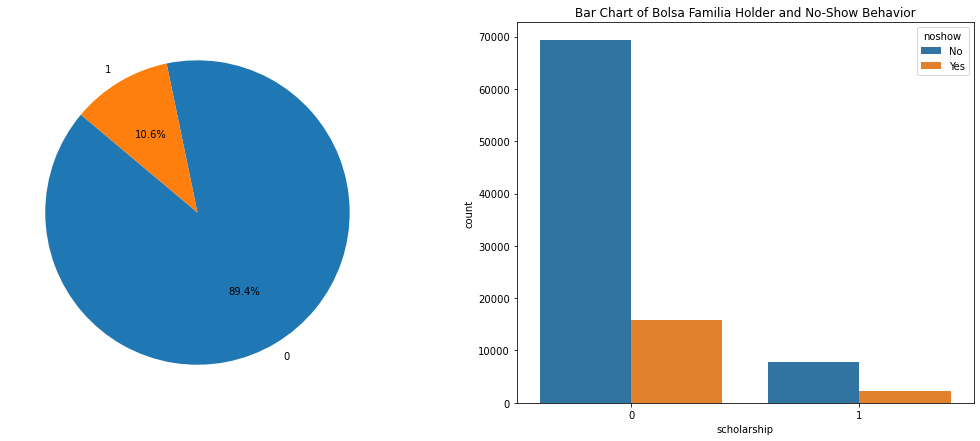

In [30]:
# creating pie chart and bar chart for gender
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.pie(df['scholarship'].value_counts(), labels=df['scholarship'].unique(), autopct='%1.1f%%',startangle=140)

plt.subplot(1,2,2)
sns.countplot(df['scholarship'], hue=df['noshow'])
plt.title('Bar Chart of Bolsa Familia Holder and No-Show Behavior')

plt.show()

In [31]:
# see the rate of no-show 
pd.crosstab(df['scholarship'], df['noshow'], normalize='index').round(4)*100

noshow,No,Yes
scholarship,,
0,81.34,18.66
1,77.55,22.45


In [32]:
# see the rate of no-show 
pd.crosstab([df['scholarship'], df['age']], df['noshow'], normalize='index').round(4)*100

noshow                      No    Yes
scholarship age                      
0           Kid          80.98  19.02
            Young Adult  76.89  23.11
            Mid-Adult    80.22  19.78
            Adult        83.43  16.57
            Elder        85.71  14.29
1           Kid          78.13  21.87
            Young Adult  73.60  26.40
            Mid-Adult    76.97  23.03
            Adult        81.31  18.69
            Elder        84.48  15.52

**SCHOLARSHIP SUMMARY**
- Patients who receive Bolsa Familia scholarship has more probability to not show up on appointment date
    - Bolsa Familia holder are poor families across Brazil
    - They have more intense no-show behavior, some of possible cause are: 
        - They do not have money to transport to hospital
        - Sometimes they are afraid they can pay medical appointment bill, then they cancel the appointment but too shy to inform it to the hospital staff
- Young adult who hold Bolsa Familia has very high rate of no-show
    - Bolsa Familia holder who are in productive age tend to not coming on medical appointment
    - There is a probability these people forgot to attend the medical appointment because they are more focused on working, since they are the breadwinner of the poor families

# Hypertension

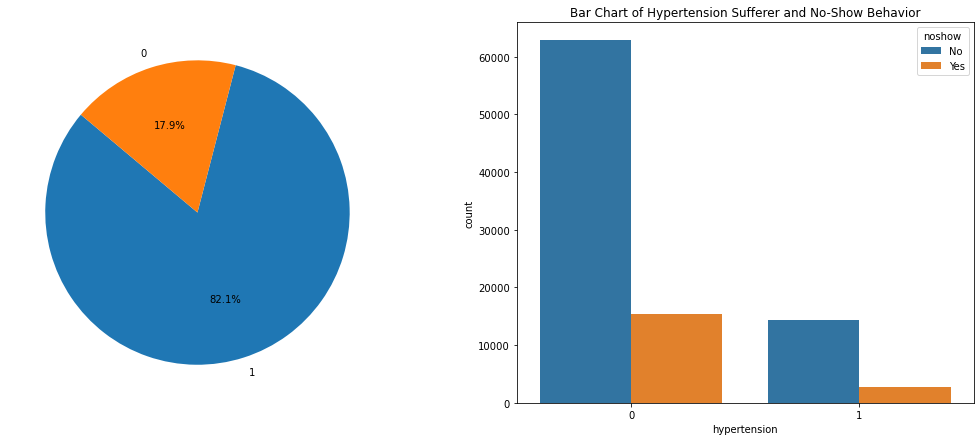

In [33]:
# creating pie chart and bar chart for hypertension
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.pie(df['hypertension'].value_counts(), labels=df['hypertension'].unique(), autopct='%1.1f%%',startangle=140)

plt.subplot(1,2,2)
sns.countplot(df['hypertension'], hue=df['noshow'])
plt.title('Bar Chart of Hypertension Sufferer and No-Show Behavior')

plt.show()

In [34]:
# see the rate of no-show 
pd.crosstab(df['hypertension'], df['noshow'], normalize='index').round(4)*100

# people with no hypertension has higher rate of no-show behavior

noshow,No,Yes
hypertension,,
0,80.34,19.66
1,83.65,16.35


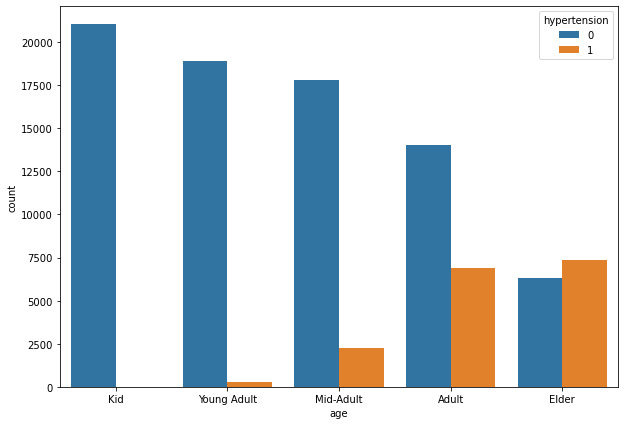

In [35]:
# diabetes and hypertension
plt.figure(figsize=(10, 7))
sns.countplot(df['age'], hue=df['hypertension'])
plt.show()

# People above 60 y.o are majorly suffer hypertension

**HYPERTENSION SUMMARY**
- Most medical appointment patients suffer hypertension
    - Hypertension has obvious symptoms
    - Patients with hypertension often feel uncomfortable, therefore they made more medical appointment to check if there is something wrong with heir body
- Patient with no hypertension has higher no-show rate
    - May be because they feel healthier, so the medicall appointment is not too urgent for them

# Diabetes

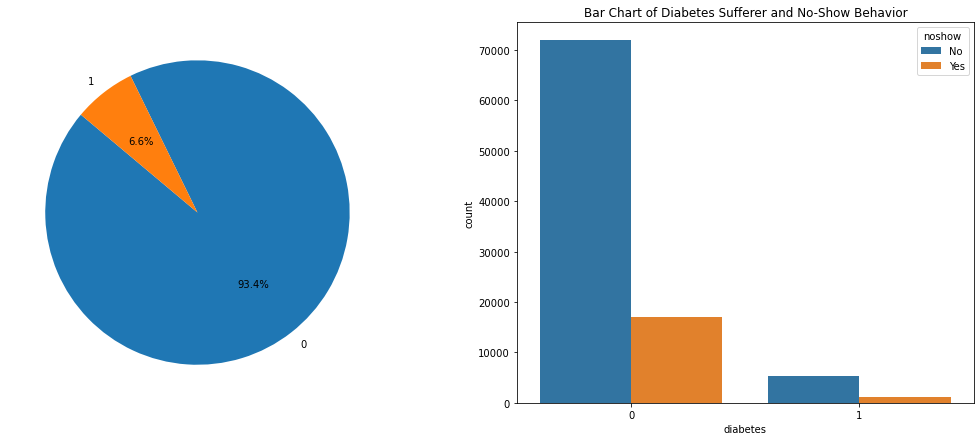

In [36]:
# creating pie chart and bar chart for diabetes
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.pie(df['diabetes'].value_counts(), labels=df['diabetes'].unique(), autopct='%1.1f%%',startangle=140)

plt.subplot(1,2,2)
sns.countplot(df['diabetes'], hue=df['noshow'])
plt.title('Bar Chart of Diabetes Sufferer and No-Show Behavior')

plt.show()

In [37]:
# see the rate of no-show 
pd.crosstab(df['diabetes'], df['noshow'], normalize='index').round(4)*100

# people with no diabetes has higher rate of no-show behavior

noshow,No,Yes
diabetes,,
0,80.81,19.19
1,82.68,17.32


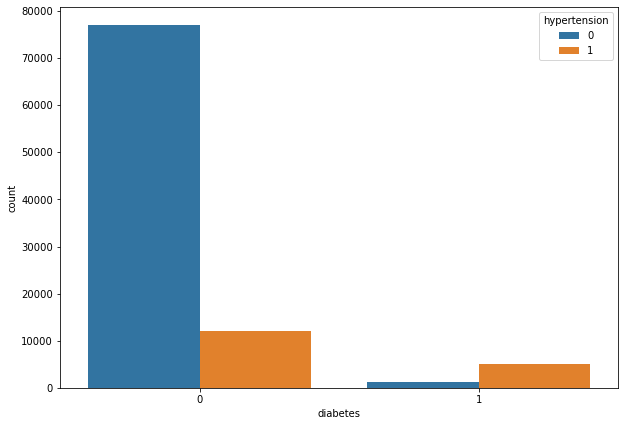

In [38]:
# diabetes and hypertension
plt.figure(figsize=(10, 7))
sns.countplot(df['diabetes'], hue=df['hypertension'])
plt.show()

# people with diabetes tend to have hypertension

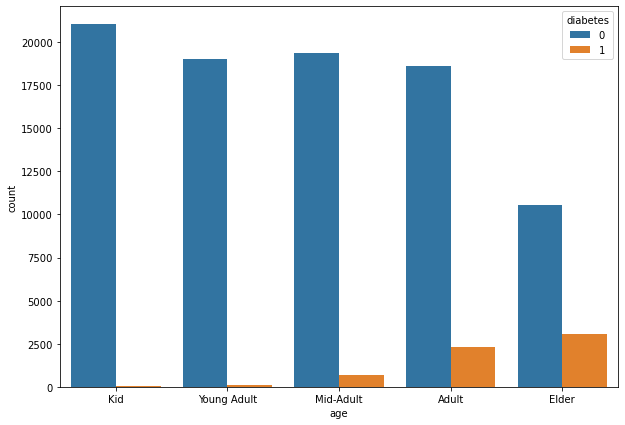

In [39]:
# diabetes and hypertension
plt.figure(figsize=(10, 7))
sns.countplot(df['age'], hue=df['diabetes'])
plt.show()

# people age from 60-75 years old has the highest number of diabetes record

**DIABETES SUMMARY**
- Only 9% of the population has diabetes record
- Quite similar with hypertension behavior, people with no diabetes record have higher no-show rate
- People who suffer diabetes are majorly suffer hypertension
    - XXXXXXXXXXX GIVE THE REASON HERE XXXXXXXXXXX

# Alcoholism

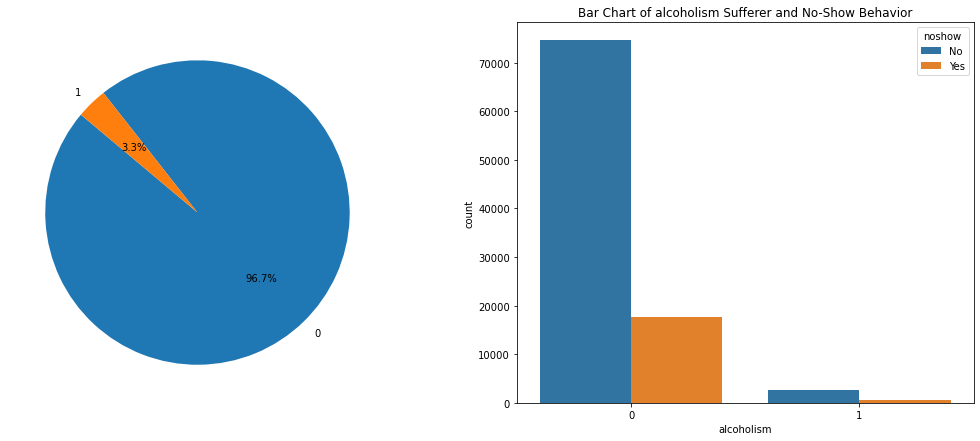

In [40]:
# creating pie chart and bar chart for alcoholism
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.pie(df['alcoholism'].value_counts(), labels=df['alcoholism'].unique(), autopct='%1.1f%%',startangle=140)

plt.subplot(1,2,2)
sns.countplot(df['alcoholism'], hue=df['noshow'])
plt.title('Bar Chart of alcoholism Sufferer and No-Show Behavior')

plt.show()

In [41]:
# see the rate of no-show 
pd.crosstab(df['alcoholism'], df['noshow'], normalize='index').round(4)*100

# people with no alcoholism has higher rate of no-show behavior

noshow,No,Yes
alcoholism,,
0,80.94,19.06
1,80.91,19.09


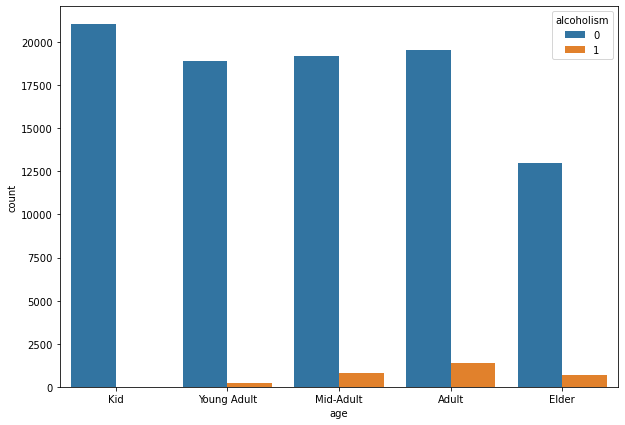

In [42]:
# age and alcoholism
plt.figure(figsize=(10, 7))
sns.countplot(df['age'], hue=df['alcoholism'])
plt.show()

# adult (45-60 y.o) has the highest rate of alcoholism

**ALCOHOLISM SUMMARY**
- Alcoholism does not seem to have a significant effect of no-show behavior
- People with and without alcoholism has nearly the same rate of no-show
- Most alcoholism patients comes from age 45-60 y.o

# Handicap
(n.) a circumstance that makes progress or success difficult

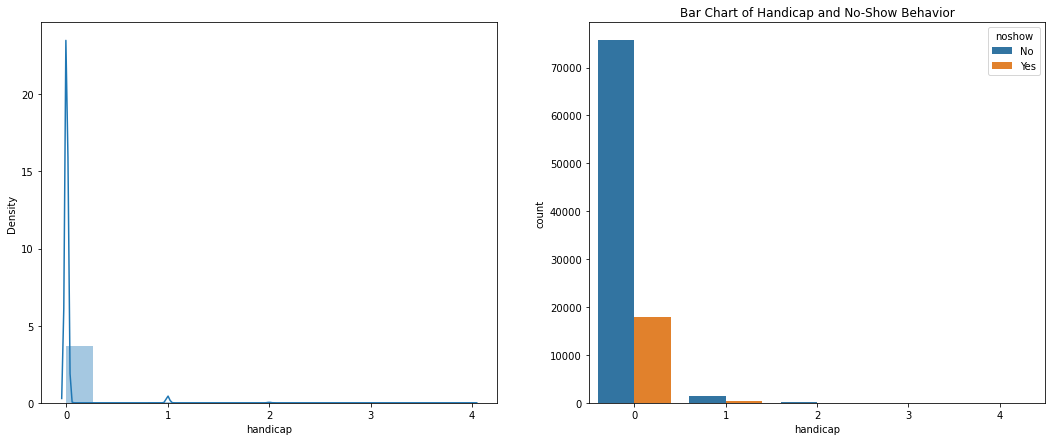

0    93517
1     1639
2      130
3       12
4        3
Name: handicap, dtype: int64


In [43]:
# handicap distribution and value count
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
sns.distplot(df['handicap'], bins=15)

plt.subplot(1,2,2)
sns.countplot(df['handicap'], hue=df['noshow'])
plt.title('Bar Chart of Handicap and No-Show Behavior')

plt.show()

print(df['handicap'].value_counts())

# most patients do not have difficulties on attending the medical appointment

In [44]:
# see the rate of no-show 
pd.crosstab(df['handicap'], df['noshow'], normalize='index').round(4)*100

# people with higher level of handicap has higher rate of no-show behavior

noshow,No,Yes
handicap,,
0,80.91,19.09
1,82.43,17.57
2,84.62,15.38
3,83.33,16.67
4,66.67,33.33


In [45]:
# correlation between handicap and age
pd.crosstab([df['age'], df['handicap']], df['noshow'], normalize='index').round(4)*100

noshow                    No     Yes
age         handicap                
Kid         0          80.79   19.21
            1          61.11   38.89
            2          89.47   10.53
            3          50.00   50.00
            4           0.00  100.00
Young Adult 0          76.35   23.65
            1          83.20   16.80
            2          90.62    9.38
            3          50.00   50.00
            4         100.00    0.00
Mid-Adult   0          79.64   20.36
            1          82.78   17.22
            2          83.33   16.67
Adult       0          83.23   16.77
            1          84.58   15.42
            2          79.17   20.83
            3         100.00    0.00
Elder       0          85.68   14.32
            1          85.45   14.55
            2          76.47   23.53
            3         100.00    0.00

**HANDICAP SUMMARY**
- Most patient do not experience difficulty in making their way to hosptal
- Handicap level and people who have tendency to no-show:
    - Level 1: Kids
    - Level 2: Elders
    - Level 3: Kids and Young Adult
    - Level 4: Kids

# Waiting Time

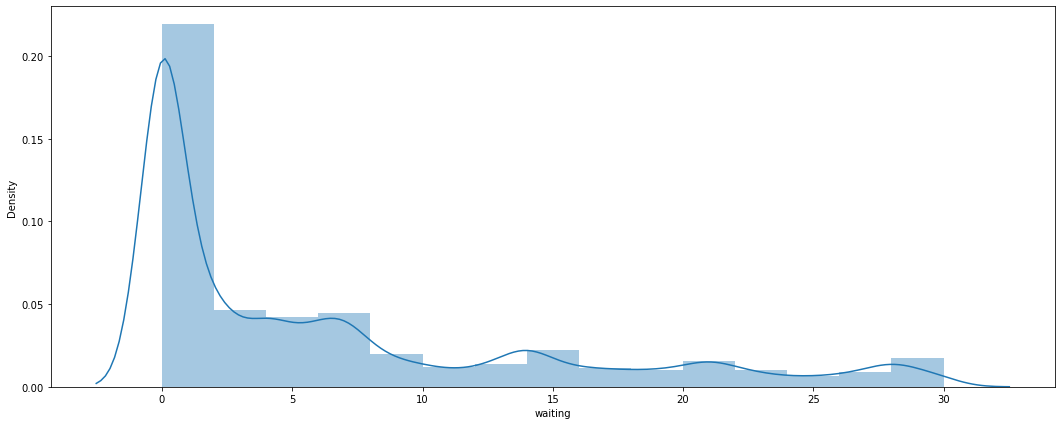

In [46]:
# waiting time distribution
plt.figure(figsize=(18,7))
sns.distplot(df['waiting'], bins=15)
plt.show()

In [47]:
# statistic description of waiting
df['waiting'].describe()

count    95301.000000
mean         6.419828
std          8.328432
min          0.000000
25%          0.000000
50%          2.000000
75%         10.000000
max         30.000000
Name: waiting, dtype: float64

In [48]:
# recategorize waiting into week
bins= [0, 7, 15, 22, 31]
labels = ['a week', '2-weeks', '3-weeks', '4-weeks']
df['waiting_week'] = pd.cut(df['waiting'], bins=bins, labels=labels, right=False)
df.sample(5)

,gender,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,waiting,sched_day,appt_day,sched_weekday,appt_weekday,weather,sms_received,noshow,waiting_week
38215,M,Kid,ANDORINHAS,1,0,0,0,0,0,4,4,1,1,sunny,0,No,a week
10422,F,Mid-Adult,MATA DA PRAIA,0,0,0,0,0,1,1,2,1,1,sunny,0,No,a week
43290,F,Young Adult,SANTA CLARA,0,0,0,0,0,14,2,2,1,1,sunny,1,No,2-weeks
8901,M,Adult,JARDIM CAMBURI,0,0,0,0,0,1,1,2,1,1,sunny,0,Yes,a week
12891,F,Kid,JESUS DE NAZARETH,0,0,0,0,0,0,1,1,1,1,sunny,0,No,a week


In [49]:
# waiting and no-show
pd.crosstab(df['waiting_week'], df['noshow'], normalize='index').round(4)*100

noshow,No,Yes
waiting_week,,
a week,87.40,12.60
2-weeks,70.27,29.73
3-weeks,67.57,32.43
4-weeks,66.63,33.37


**WAITING SUMMARY**
- Mean waiting time is 6 week
    - In the most case, people make and come to medical appointment in the same day
    - In average, people booked medical appointment a week before the appointment date
- The longer the waiting time, the possibility to no-show is getting bigger
    - The possibility is: they forget about the appointment because it is too long after they made the appointment
- There is no data on sunday, probably, the medical checkup center is closed on Sunday due to doctors inavailability

# Schedule Day

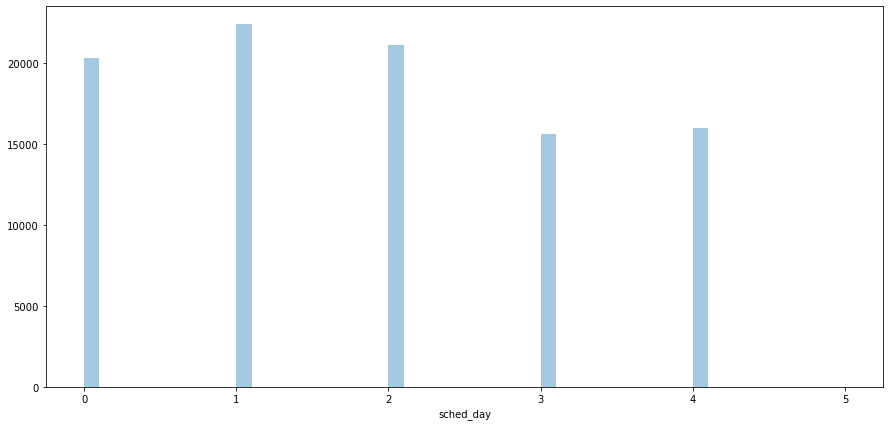

1    22372
2    21081
0    20280
4    15966
3    15581
5       21
Name: sched_day, dtype: int64


In [50]:
# see schedule day distribution
plt.figure(figsize=(15,7))
sns.distplot(df['sched_day'], kde=False)
plt.show()

print(df['sched_day'].value_counts())

# crowded day is tuesday and wednesday

In [51]:
# schedule day and no-show behavior
pd.crosstab(df['sched_day'], df['noshow'], normalize='index').round(4)*100

noshow,No,Yes
sched_day,,
0,81.11,18.89
1,80.79,19.21
2,81.00,19.00
3,80.97,19.03
4,80.77,19.23
5,100.00,0.00


**SCHEDULE DAY SUMMARY**
- Most people booked appointment on Tuesday and Wednesday
    - Tuesday and Wednesday are categorized as mid-week
    - In the mid-week, work tense is decreased from monday, making people realize that their health is also important  besides their job.
- Although people who booked on Sunday are 100% show up on the appointment, overall data do not show significant correlation with no-show behavior

# Appointment Date

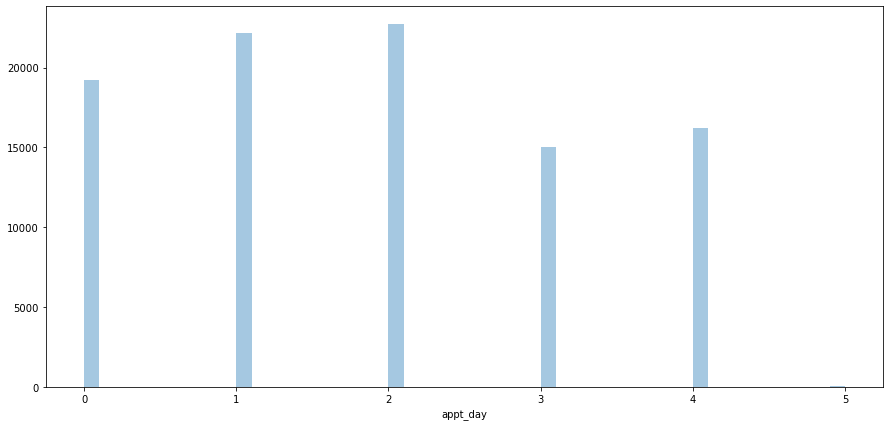

2    22705
1    22155
0    19198
4    16192
3    15015
5       36
Name: appt_day, dtype: int64


In [52]:
# distribution of apppointment date
plt.figure(figsize=(15,7))
sns.distplot(df['appt_day'], kde=False)
plt.show()

print(df['appt_day'].value_counts())

In [53]:
# schedule day and no-show behavior
pd.crosstab(df['appt_day'], df['noshow'], normalize='index').round(4)*100

noshow,No,Yes
appt_day,,
0,81.13,18.87
1,80.92,19.08
2,81.05,18.95
3,81.74,18.26
4,79.82,20.18
5,80.56,19.44


**APPOINTMENT DAY**
- Most people planned to have the appointment on Wednesday and Tuesday
- There is no significant correlation between appointment date and no-show behavior

# Schedule: Weekday

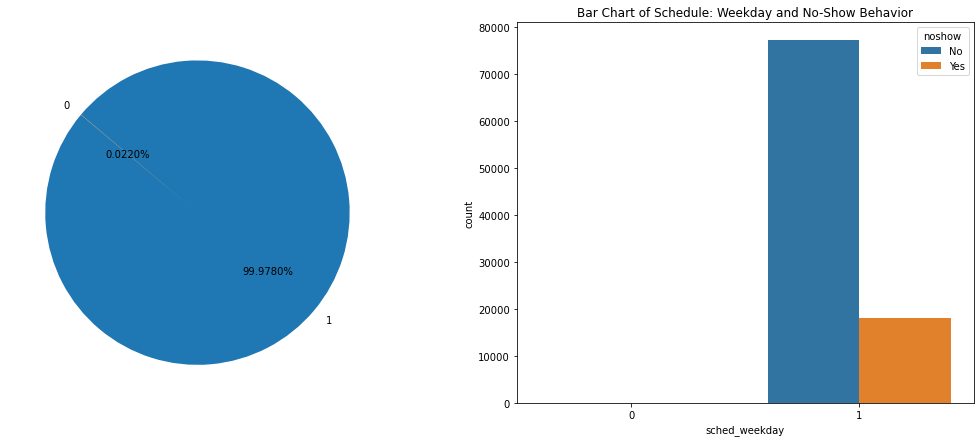

1    95280
0       21
Name: sched_weekday, dtype: int64


In [54]:
# creating pie chart and bar chart for alcoholism
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.pie(df['sched_weekday'].value_counts(), labels=df['sched_weekday'].unique(), autopct='%1.4f%%',startangle=140)

plt.subplot(1,2,2)
sns.countplot(df['sched_weekday'], hue=df['noshow'])
plt.title('Bar Chart of Schedule: Weekday and No-Show Behavior')

plt.show()

print(df['sched_weekday'].value_counts())

In [55]:
# schedule day and no-show behavior
pd.crosstab(df['sched_weekday'], df['noshow'], normalize='index').round(4)*100

noshow,No,Yes
sched_weekday,,
0,100.00,0.00
1,80.93,19.07


**SCHEDULE: WEEKDAY SUMMARY**
- People who scheduled the appointment on weekday has higher rate of no-show

# Appointment: Weekday

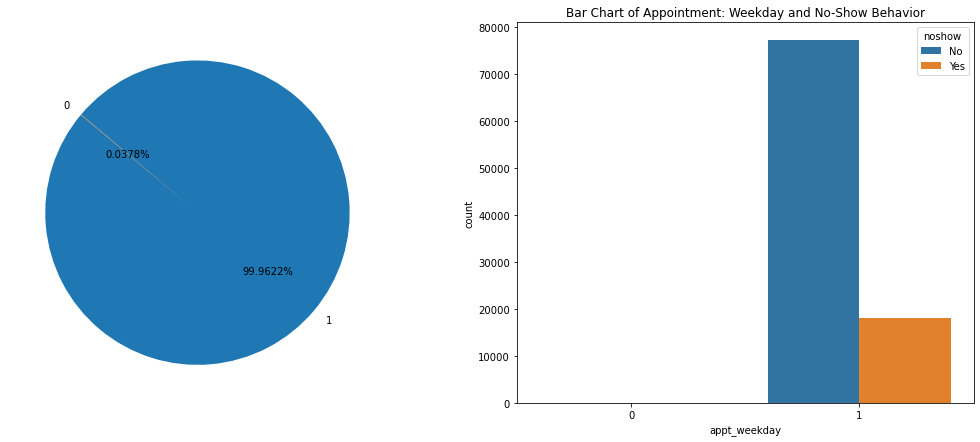

1    95265
0       36
Name: appt_weekday, dtype: int64


In [56]:
# creating pie chart and bar chart for alcoholism
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.pie(df['appt_weekday'].value_counts(), labels=df['appt_weekday'].unique(), autopct='%1.4f%%',startangle=140)

plt.subplot(1,2,2)
sns.countplot(df['appt_weekday'], hue=df['noshow'])
plt.title('Bar Chart of Appointment: Weekday and No-Show Behavior')

plt.show()

print(df['appt_weekday'].value_counts())

In [57]:
# appointment day and no-show behavior
pd.crosstab(df['appt_weekday'], df['noshow'], normalize='index').round(4)*100

noshow,No,Yes
appt_weekday,,
0,80.56,19.44
1,80.94,19.06


**APPOINTMENT: WEEKDAY SUMMARY**
- Most people planned to have medical appointment on weekday
- There is no significant correlation between appointment: weekday and no-show behavior

# Weather

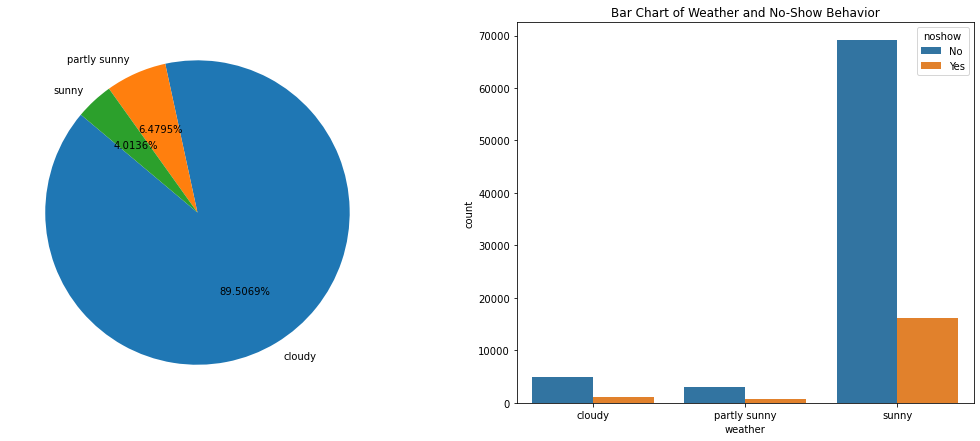

sunny           85301
cloudy           6175
partly sunny     3825
Name: weather, dtype: int64


In [58]:
# creating pie chart and bar chart for alcoholism
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.pie(df['weather'].value_counts(), labels=df['weather'].unique(), autopct='%1.4f%%',startangle=140)

plt.subplot(1,2,2)
sns.countplot(df['weather'], hue=df['noshow'])
plt.title('Bar Chart of Weather and No-Show Behavior')

plt.show()

print(df['weather'].value_counts())

In [59]:
# weather and no-show behavior
pd.crosstab(df['weather'], df['noshow'], normalize='all').round(4)*100

noshow,No,Yes
weather,,
cloudy,5.26,1.22
partly sunny,3.19,0.82
sunny,72.49,17.02


In [60]:
# weather and no-show behavior
pd.crosstab(df['weather'], df['noshow'], normalize='index').round(4)*100

noshow,No,Yes
weather,,
cloudy,81.12,18.88
partly sunny,79.56,20.44
sunny,80.98,19.02


**WEATHER SUMMARY**
- Most of no-show case happens in sunny day
- No-show rate is at its highest when the weather is partly sunny

# SMS Received

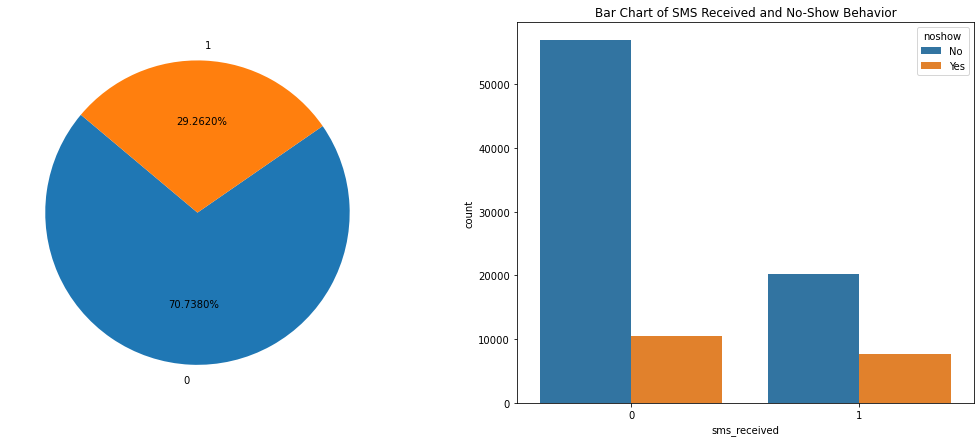

0    67414
1    27887
Name: sms_received, dtype: int64


In [61]:
# creating pie chart and bar chart for alcoholism
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.pie(df['sms_received'].value_counts(), labels=df['sms_received'].unique(), autopct='%1.4f%%',startangle=140)

plt.subplot(1,2,2)
sns.countplot(df['sms_received'], hue=df['noshow'])
plt.title('Bar Chart of SMS Received and No-Show Behavior')

plt.show()

print(df['sms_received'].value_counts())

In [62]:
# sms_received and no-show behavior
pd.crosstab(df['sms_received'], df['noshow'], normalize='index').round(4)*100

noshow,No,Yes
sms_received,,
0,84.35,15.65
1,72.69,27.31


In [63]:
# sms_received and no-show behavior
pd.crosstab([df['sms_received'], df['waiting_week']], df['noshow'], normalize='index').round(4)*100

noshow                        No    Yes
sms_received waiting_week              
0            a week        89.04  10.96
             2-weeks       67.57  32.43
             3-weeks       63.98  36.02
             4-weeks       61.14  38.86
1            a week        76.64  23.36
             2-weeks       72.18  27.82
             3-weeks       70.02  29.98
             4-weeks       69.91  30.09

**SMS RECEIVED SUMMARY**
- If we see from only sms_received column, is shows that people who receive sms reminder have higher no-show rate.
- But, when we combine sms_received with date, it gives us information that sms reminder lower the rate of no-show, except on patient who schedule a week before appointment

# Correlation between Features and Target

In [64]:
# load encoded data
df_enc = pd.read_csv('med_appt_encoded.csv')
df_enc.sample(5)

FileNotFoundError: [Errno 2] No such file or directory: 'med_appt_encoded.csv'

In [ ]:
# dropping unnecessary columns
df_enc = df_enc.drop(columns=['patientID', 'apptID', 'sched_date', 'appt_date'])
df_enc.sample(5)

In [ ]:
# see the correlation between features and noshow column
df_enc.corr()['noshow'].sort_values(ascending=False)[1:]

# Important Features to Add in Machine Learning Process

The features are:
1. waiting
2. sms_received
3. scholarship
4. diabetes
5. hypertension
6. age

In [ ]:
# extracting important features
df_ml = df_enc[['waiting', 'sms_received', 'scholarship', 'diabetes', 'hypertension', 'age', 'noshow']]
df_ml.sample(5)

In [ ]:
# export to csv
df_ml.to_csv('03 - med_appt_ml.csv', index=False)

In [ ]:
pd.read_csv('03 - med_appt_ml.csv').head()